# <p align="center">Predicting White Wine Quality</p>

### Using Machine Learning model to predict the quality of white wines

### Data Source:

This dataset is from the UCI machine learning repository,
https://archive.ics.uci.edu/ml/datasets/wine+quality, to get both the dataset i.e. red and white vinho verde wine samples, from the north of Portugal, please visit the above link.


  
**Table of contents:**
* [Summary](#Summary)
* [Data Exploration](#exploration)
* [Cleaning](#cleaning)
* [Model Building](#model-building)
  - [Model Fine-Tuning](#model-tuning)
* [Conclusion](#conclusion)


**Summary:**

In the present project, we aim to conduct a comprehensive analysis of the dataset by investigating its distributions and interrelationships. We will identify and address any outliers, select pertinent features, and develop and assess hypotheses. Furthermore, we will explore a range of classification methodologies, culminating in the optimization of the most effective model.

Outcome: A Random Forest Classifier model that achieves 69% accuracy in predicting wine quality. With further refinements incorporating insights from wine experts, this model could potentially assist wineries or individuals in accurately assessing the quality of their wines.


***Features:***

**```fixed_acidity```** - Fixed acidity of the wine.

**```volatil_acidity```** - Volatile acidity of the wine.

**```citric_acid```** - Amount of citric acid in the wine.

**```residual_sugar```** - Amount of residual sugar in the wine.

**```chlorides```** - Amount of Chlorides in the wine.

**```free_sulfur_dioxide```** - The amount of Sulfur Dioxide in the wine that is free.

**```total_sulfur_dioxide```** - Amount of Sulfur Dioxide present in the wine.

**```density```** - Density of the wine

**```pH```** - pH level of the wine.

**```sulphates```** - Amount of sulphates in the wine.

**```alcohol```** - Alcohol content in the wine.

**```quality```** - Quality of the wine. This is our target variable.

## <p align="center">Data Exploration</p>

In [1]:
#Importing all the necessary libraries:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('white_wine.csv')

In [3]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [4]:
df[['fixed_acidity',"volatil_acidity","citric_acid","residual_sugar",
   "chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density",
   "pH","sulphates","alcohol","quality"]] = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].apply(\
                                               lambda x: pd.Series(str(x).split(";")))

All features are combined into a single column, separated by semicolons. Initially, a lambda function is applied to separate the data into distinct columns, followed by the removal of the original column.

In [5]:
to_drop = df.columns[0]

In [6]:
df.drop(columns = to_drop, inplace= True)

In [7]:
df

,fixed_acidity,volatil_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6
4894,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7


Before performing any machine learning on this dataset, we will look at the correlation between the features.

In [8]:
df = df.astype('float')

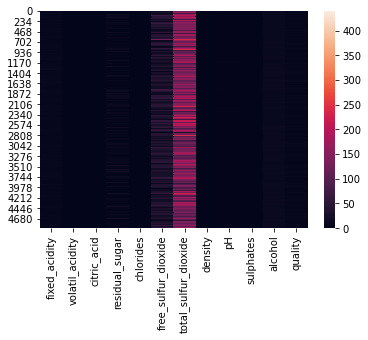

In [9]:
sns.heatmap(df)
plt.show()

In [10]:
df.corr()

,fixed_acidity,volatil_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatil_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Text(0.5, 1.0, 'Correlation Matrix')

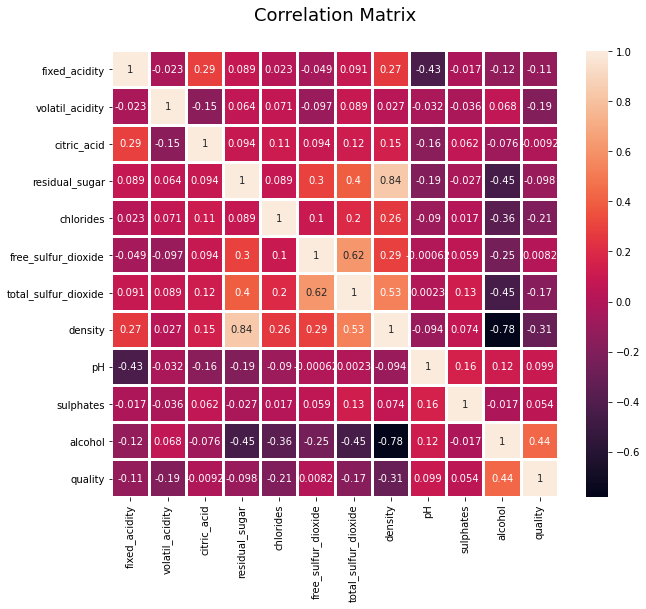

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True, linewidth=2 ,cbar_kws={'shrink':0.82})
plt.title('Correlation Matrix',fontsize=18, pad=30)

Looking at the correlation between just the target variable and features:

Text(0.5, 1.0, 'Correlation with Quality')

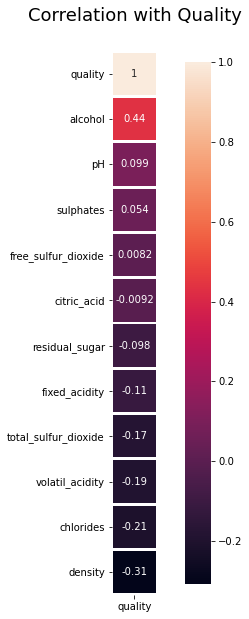

In [12]:
plt.figure(figsize=(10, 10))

correlations = pd.DataFrame(df.corr()["quality"].sort_values(ascending=False))
sns.heatmap(correlations,annot=True,square=True,linewidth=2,cbar_kws={'shrink':0.96})
plt.title('Correlation with Quality',fontsize=18, pad=30)

plt.show()

It is evident that the quality of wine is primarily influenced by alcohol content and density. Generally, a wine with a higher alcohol content and lower density tends to be of superior quality. Conversely, sulphates appear to play a minimal role in determining the quality of the wine.

Now let's look at the top four features that impact quality (namely ```alcohol```, ```density```, ```chlorides```, and ```volatil_acidity```):

In [13]:
my_cmap = plt.get_cmap("magma")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.rcParams["figure.figsize"] = (15,6.75)

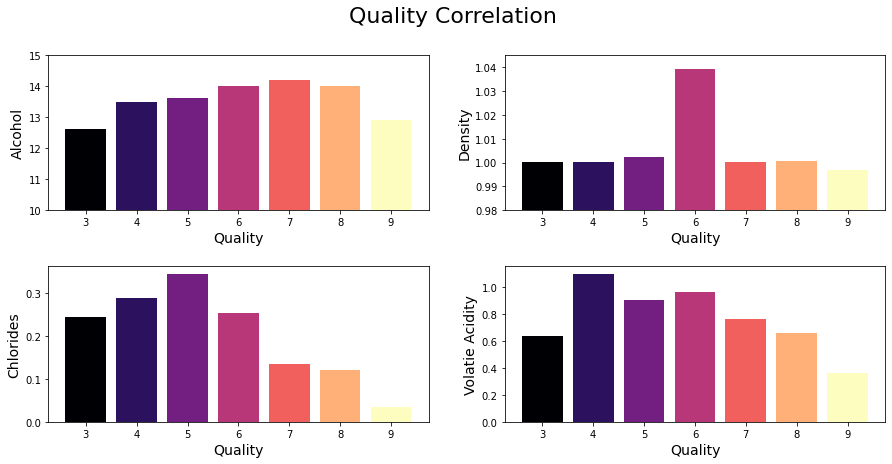

In [14]:
# Visualising the relationship between important features and wine quality:

plt.subplots_adjust(wspace=0.2,hspace=0.36)
plt.suptitle('Quality Correlation',fontsize=22)

plt.subplot(2,2,1)
plt.bar(df['quality'], df['alcohol'], color=my_cmap(rescale(df['quality'])))
plt.ylim(10,15)
plt.xlabel('Quality', size = 14)
plt.ylabel('Alcohol', size = 14)

plt.subplot(2,2,2)
plt.bar(df['quality'], df['density'], color=my_cmap(rescale(df['quality'])))
plt.ylim(0.98,1.045)
plt.xlabel('Quality', size = 14)
plt.ylabel('Density', size = 14)

plt.subplot(2,2,3)
plt.bar(df['quality'], df['chlorides'], color=my_cmap(rescale(df['quality'])))
plt.xlabel('Quality', size = 14)
plt.ylabel('Chlorides', size = 14)

plt.subplot(2,2,4)
plt.bar(df['quality'], df['volatil_acidity'], color=my_cmap(rescale(df['quality'])))
plt.xlabel('Quality', size = 14)
plt.ylabel('Volatie Acidity', size = 14)

plt.show()

As the variations in alcohol content and density were quite subtle, I focused more closely on these parameters by narrowing the y-axis range, making it easier to discern their changes.

```alcohol``` - Wines with quality between 6 to 8 have the most alcohol. Interestingly, 9s have almost the same alcohol as 3s.

```density``` - Normally distributed. Wines with quality 6 seem to be the most dense. Highest quality wines have the lowest density.

```chlorides``` - Since this is negatively correlated, we can see that the best wines have the lowest chlorides.

```volatil_acidity``` - Similar to chlorides.
_____________

Now let's take a look at their distributions:

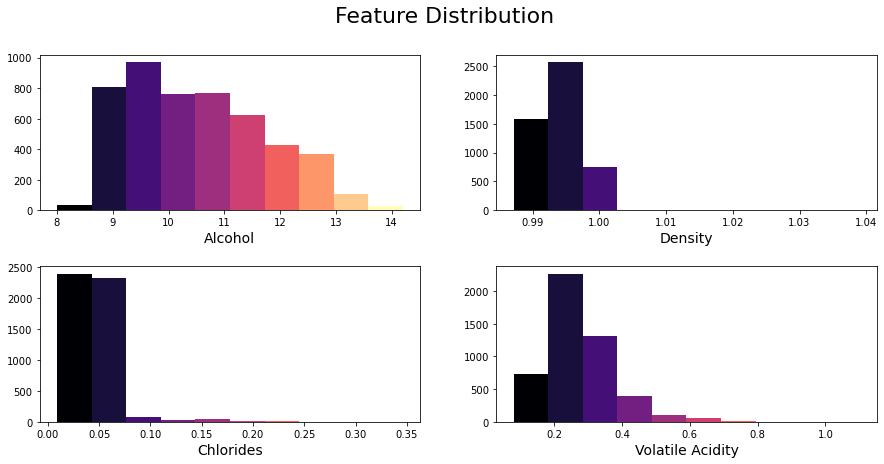

In [15]:
# Visualising the distribution of main features:

plt.subplots_adjust(wspace=0.2,hspace=0.36)
plt.suptitle('Feature Distribution',fontsize=22)

plt.subplot(2,2,1)
n, bins, patches = plt.hist(df['alcohol'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Alcohol', size = 14)


plt.subplot(2,2,2)
n, bins, patches = plt.hist(df['density'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Density', size = 14)


plt.subplot(2,2,3)
n, bins, patches = plt.hist(df['chlorides'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Chlorides', size = 14)


plt.subplot(2,2,4)
n, bins, patches = plt.hist(df['volatil_acidity'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Volatile Acidity', size = 14)

plt.show()

```alcohol``` - Fairly normal distribution. Skewed to the right.

```density```, ```chlorides```,```volatil_acidity``` - Non normal distribution. There seem to be a lot of outliers. These will probably have to be scaled depending on the model.

Box plot of their distribution will give a better outlook of the outliers

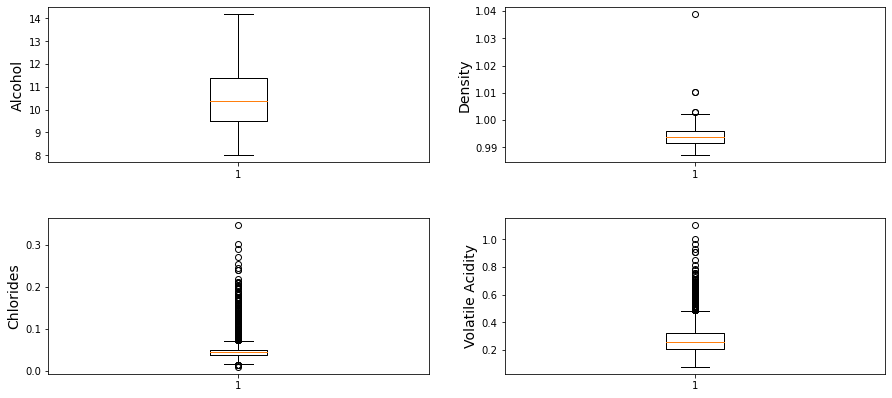

In [16]:
# visualising the distribution using Box Plot:

plt.subplots_adjust(wspace=0.2,hspace=0.36)


plt.subplot(2,2,1)
plt.boxplot(df['alcohol'])
plt.ylabel('Alcohol', size = 14)

plt.subplots_adjust(wspace=0.2,hspace=0.36)

plt.subplot(2,2,2)
plt.boxplot(df['density'])
plt.ylabel('Density', size = 14)

plt.subplot(2,2,3)
plt.boxplot(df['chlorides'])
plt.ylabel('Chlorides', size = 14)

plt.subplot(2,2,4)
plt.boxplot(df['volatil_acidity'])
plt.ylabel('Volatile Acidity', size = 14)

plt.show()

We can see that there are a lot of outliers. These can negatively affect model performance.
_________

Given that the ```alcohol``` attribute exhibits the strongest correlation, it would be prudent to examine its relationship with the other characteristics to gain a better understanding.

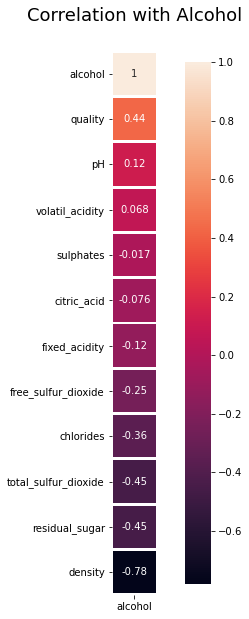

In [17]:
# Visualising the correlation between alcohol content and other features:

plt.figure(figsize=(10, 10))
correlations = pd.DataFrame(df.corr()["alcohol"].sort_values(ascending=False))
sns.heatmap(correlations,annot=True,square=True,linewidth=2,cbar_kws={'shrink':0.96})
plt.title('Correlation with Alcohol',fontsize=18, pad=30)

plt.show()

Now let us also have a look at the relationship between it's top 4 highest correlated variables, ```density```, ```residual_sugar```, ```total_sulfur_dioxide``` and ```chlorides``` (I have excluded ```quality``` as it is not a continuous measure).

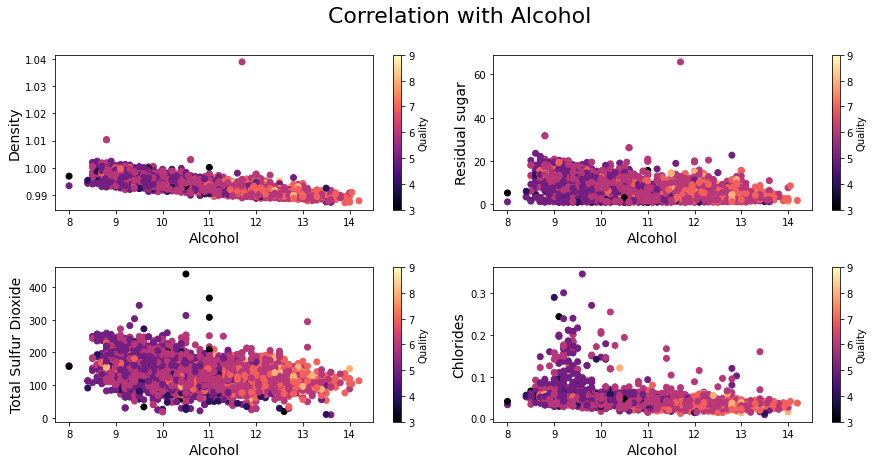

In [18]:


plt.rcParams["figure.figsize"] = (15,6.75)
plt.subplots_adjust(wspace=0.1,hspace=0.37)
plt.suptitle('Correlation with Alcohol',fontsize=22)

plt.subplot(2,2,1)
plt.scatter(x=df['alcohol'],y=df['density'],c=df['quality'],cmap='magma')
plt.colorbar(label="Quality", orientation="vertical")
plt.xlabel('Alcohol', size = 14)
plt.ylabel('Density', size = 14)

plt.subplot(2,2,2)
plt.scatter(x=df['alcohol'],y=df['residual_sugar'],c=df['quality'],cmap='magma')
plt.colorbar(label="Quality", orientation="vertical")
plt.xlabel('Alcohol', size = 14)
plt.ylabel('Residual sugar', size = 14)

plt.subplot(2,2,3)
plt.scatter(df['alcohol'],df['total_sulfur_dioxide'],c=df['quality'],cmap='magma')
plt.colorbar(label="Quality", orientation="vertical")
plt.xlabel('Alcohol', size = 14)
plt.ylabel('Total Sulfur Dioxide', size = 14)

plt.subplot(2,2,4)
plt.scatter(df['alcohol'],df['chlorides'],c=df['quality'],cmap='magma')
plt.colorbar(label="Quality", orientation="vertical")
plt.xlabel('Alcohol', size = 14)
plt.ylabel('Chlorides', size = 14)

plt.show()

## <p align="center">Data Cleaning</p>

As my expertise in wines is somewhat limited, determining the appropriate threshold for discarding outliers can be challenging. I will strive to eliminate only the most extreme cases. However, it is important to remember that this model may not be optimally suited for real-world applications.

### Removing Outliers

For most of the highly correlated features, I have discarded values over the .995 percentile, and under the .005 percentile.

In [19]:
df = pd.read_csv('cleaned_data.csv')
df.columns

Index(['fixed_acidity', 'volatil_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
## REMOVING OUTLIERS ##

df = df[
    ((df.total_sulfur_dioxide < df.total_sulfur_dioxide.quantile(.995))
    &
     (df.total_sulfur_dioxide > df.total_sulfur_dioxide.quantile(.005)))
    &
    ((df.pH < df.pH.quantile(.995))
    &
     (df.pH > df.pH.quantile(.05)))
    &
    ((df.fixed_acidity < df.fixed_acidity.quantile(.995))
     &
     (df.fixed_acidity > df.fixed_acidity.quantile(.005)))
    &
    ((df.residual_sugar < df.residual_sugar.quantile(.995))
     &
     df.residual_sugar > df.residual_sugar.quantile(.005))
    &
    ((df.chlorides < df.chlorides.quantile(.995))
     &
     df.chlorides > df.chlorides.quantile(.005))
    &
    ((df.density < df.density.quantile(.995))
     &
     df.density > df.density.quantile(.005))
    &
    ((df.volatil_acidity < df.volatil_acidity.quantile(.995))
     &
     df.volatil_acidity > df.volatil_acidity.quantile(.005))]

In [21]:
df.head()

,fixed_acidity,volatil_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0


The four highest correlated features in the new dataset:

**Bar Chart:**

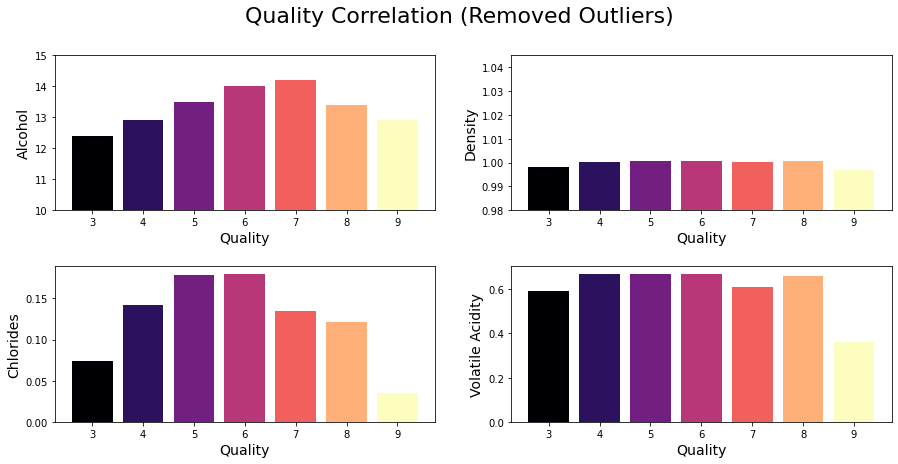

In [22]:
my_cmap = plt.get_cmap("magma")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.rcParams["figure.figsize"] = (15,6.75)

plt.subplots_adjust(wspace=0.2,hspace=0.36)
plt.suptitle('Quality Correlation (Removed Outliers)',fontsize=22)

plt.subplot(2,2,1)
plt.bar(df['quality'], df['alcohol'], color=my_cmap(rescale(df['quality'])))
plt.ylim(10,15)
plt.xlabel('Quality', size = 14)
plt.ylabel('Alcohol', size = 14)

plt.subplot(2,2,2)
plt.bar(df['quality'], df['density'], color=my_cmap(rescale(df['quality'])))
plt.ylim(0.98,1.045)
plt.xlabel('Quality', size = 14)
plt.ylabel('Density', size = 14)

plt.subplot(2,2,3)
plt.bar(df['quality'], df['chlorides'], color=my_cmap(rescale(df['quality'])))
plt.xlabel('Quality', size = 14)
plt.ylabel('Chlorides', size = 14)

plt.subplot(2,2,4)
plt.bar(df['quality'], df['volatil_acidity'], color=my_cmap(rescale(df['quality'])))
plt.xlabel('Quality', size = 14)
plt.ylabel('Volatile Acidity', size = 14)

plt.show()

**Distributions:**

Boxplots:

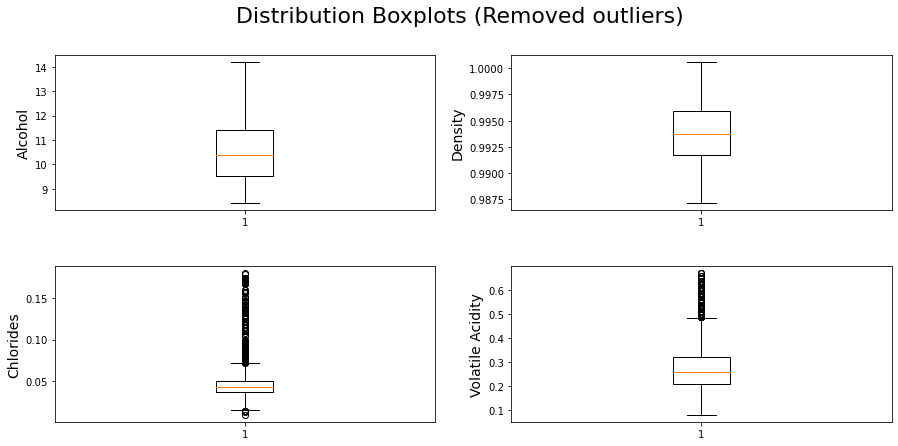

In [23]:
plt.subplot(2,2,1)
plt.boxplot(df['alcohol'])
plt.ylabel('Alcohol', size = 14)

plt.subplots_adjust(wspace=0.2,hspace=0.36)
plt.suptitle('Distribution Boxplots (Removed outliers)',fontsize=22)

plt.subplot(2,2,2)
plt.boxplot(df['density'])
plt.ylabel('Density', size = 14)

plt.subplot(2,2,3)
plt.boxplot(df['chlorides'])
plt.ylabel('Chlorides', size = 14)

plt.subplot(2,2,4)
plt.boxplot(df['volatil_acidity'])
plt.ylabel('Volatile Acidity', size = 14)

plt.show()


Histograms:

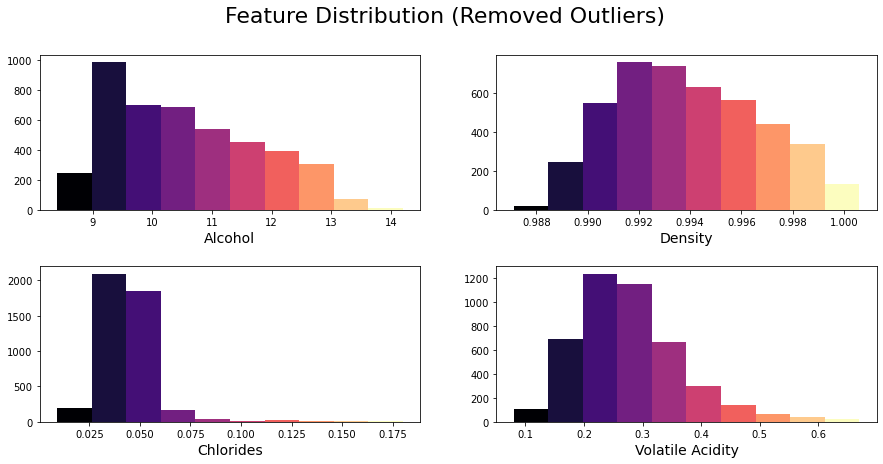

In [24]:
plt.subplot(2,2,1)
n, bins, patches = plt.hist(df['alcohol'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Alcohol', size = 14)

plt.subplots_adjust(wspace=0.2,hspace=0.36)
plt.suptitle('Feature Distribution (Removed Outliers)',fontsize=22)

plt.subplot(2,2,2)
n, bins, patches = plt.hist(df['density'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Density', size = 14)

plt.subplot(2,2,3)
n, bins, patches = plt.hist(df['chlorides'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Chlorides', size = 14)

plt.subplot(2,2,4)
n, bins, patches = plt.hist(df['volatil_acidity'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Volatile Acidity', size = 14)

plt.show()


Compared to before removing the outliers, the distribution of these four features looks closer to a normal distribution.
_____

## <p align="center">Model Building</p>

I will be using a ***Random Forest*** model to predict the quality of wine based on the cleaned dataset.

In [25]:
# Importing the libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [26]:
df.columns

Index(['fixed_acidity', 'volatil_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
# Defining the features and target variables:

X = df.drop('quality',axis=1)
y = df['quality']

In [28]:
# Splitting the dataset into training and test subsets:

X_train, X_test, y_train,y_test = train_test_split(X, y, stratify = y, 
                                                   random_state=123,test_size=.2)


In [29]:
# Defining th model:
rf = RandomForestClassifier(random_state=(123))

In [30]:
# fitting the model onto data:

rf.fit(X_train,y_train) 
print('Model Accuracy:', rf.score(X_test, y_test).round(4))

Model Accuracy: 0.6814


This accuracy is low. Next we try to improve the model by applying ***GridSearchCV*** to find the best combination of hyperparameters for the model.
_____

### <p align="center">Model Fine-Tuning</p>

Now we are going to take the best model and increase its performance by tuning the hyperparameters. I'll first use RandomizedSearchCV, and then GridSearchCV on the resulting RSCV model, and tune it further.

First I am going to import randomized search, then set a range for the hyperparameters I want to test. And I fit a new random forest into the RSCV and get the best params.

Then, I instantiate a new model using the best RSCV parameters, fit the training data into it and score the test data:


In [31]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf3 = RandomForestClassifier()
rf_rscv = RandomizedSearchCV(estimator=rf3, param_distributions=random_grid,
                             n_iter = 100, cv = 3, verbose=2, random_state=42, 
                             n_jobs = -1)
rf_rscv.fit(X_train,y_train)
rf_rscv.best_params_

rf_rand = RandomForestClassifier(n_estimators= 1000,min_samples_split= 2,
                                 min_samples_leaf= 1,max_features= 'sqrt',
                                 max_depth=20,bootstrap= True) # Best params rscv


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [32]:
# Fitting the new model:

rf_rand.fit(X_train,y_train)
rf_rand.score(X_test,y_test) 
y_pred = rf_rand.predict(X_test)

In [33]:
print('Model Accuracy after Random Search:',rf_rand.score(X_test,y_test))

Model Accuracy after Random Search: 0.6847457627118644


Next, we are going to run a grid search for the values around the best RSCV parameters:

In [34]:
# Grid Search

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[500,1000,1500],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,3],
              'max_features':[2,3],
              'max_depth':[30,40,50,60],
              'bootstrap':[True]}
rf4 = RandomForestClassifier()

rf_gscv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rf_gscv.fit(X_train,y_train)
rf_gscv.best_params_

rf_fin = RandomForestClassifier(n_estimators= 1000,min_samples_split= 2,
                                 min_samples_leaf= 1,max_features=3,
                                 max_depth=30,bootstrap= True) # Best params GridSearch


Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [35]:
# Fitting the model:

rf_fin.fit(X_train,y_train)
print('Model Accuracy after GridSearch:',rf_fin.score(X_test,y_test))


Model Accuracy after GridSearch: 0.6813559322033899


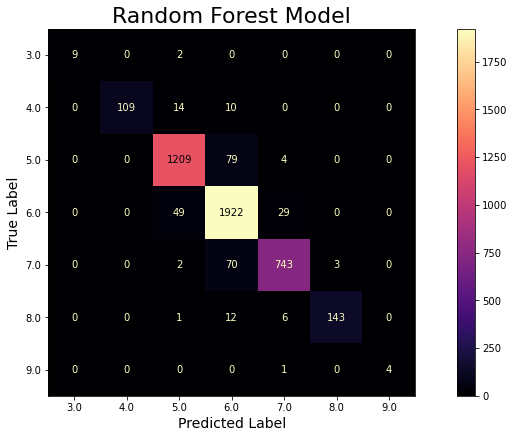

In [36]:
# Investigating the accuracy of the model trough confusion matrix:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_fin,X,y,cmap=plt.cm.magma)
plt.title('Random Forest Model', fontsize=22)
plt.xlabel('Predicted Label', size = 14)
plt.ylabel('True Label', size = 14)

plt.show()